# Zomato Banglore Restaurants
### The primary objective of this project is to perform comprehensive exploratory data analysis (EDA) on the Zomato Bangalore restaurant dataset to uncover patterns, trends, and relationships that influence customer ratings. The analysis involves cleaning and preprocessing the dataset, handling missing values, transforming categorical variables, and deriving meaningful insights from variables such as restaurant location, cost, online order availability, and table booking options.

## Following the EDA, a linear regression model is implemented to predict restaurant ratings based on selected features including votes, approximate cost for two people, online ordering, table reservation, and location. The model's performance is evaluated using key metrics such as R² score and RMSE. This serves as a baseline for future enhancements through feature engineering and advanced regression models aimed at improving prediction accuracy.





In [5]:
import pandas as pd

In [6]:
df=pd.read_csv('zomato.csv')

__1. How big is data ?__


In [8]:
df.shape

(51717, 17)

__2. How does the data look like ?__

In [10]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [11]:
df.sample(5)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
16372,https://www.zomato.com/bangalore/shake-it-off-...,"12, Bhanu Nursing Home Road, Blore, Bommanahal...",Shake It Off,No,No,NaN,0,+91 7829054321,Bommanahalli,Beverage Shop,NaN,Beverages,200,[],[],Delivery,HSR
35713,https://www.zomato.com/bangalore/kokomo-korama...,"Near Bharat Residency, MM Garden, Koramangala ...",Kokomo,Yes,No,4.0 /5,195,+91 9148164362\n+91 8884144911,Koramangala 6th Block,Delivery,"Thai Chicken, Momos","Thai, Chinese",500,"[('Rated 1.0', 'RATED\n Ordered food a week a...","['Veg Red Curry with Rice Combo', 'Veg Green C...",Delivery,Koramangala 7th Block
40292,https://www.zomato.com/bangalore/swathi-restau...,"1, Near Mantri Mall, Seshadripuram, Bangalore",Swathi Restaurant,No,No,3.9 /5,35,080 23562122,Seshadripuram,Casual Dining,NaN,"Chinese, North Indian, South Indian",600,"[('Rated 4.0', 'RATED\n Perfect family dining...",[],Dine-out,Malleshwaram
9895,https://www.zomato.com/bhaijaan-barbeques-food...,"Opposite Ranka Colony, Off Bannerghatta Road, ...",Bhaijaan Barbeques,Yes,No,3.5/5,9,+91 9901822443,South Bangalore,Food Truck,NaN,"Mughlai, Arabian, BBQ",200,"[('Rated 5.0', 'RATED\n best lip smacking sha...","['Whole Meat Shawarma', 'Classic Shawarma', 'C...",Delivery,BTM
28579,https://www.zomato.com/bangalore/marias-goan-k...,"360, 1st Floor, 1st Main, Koramangala 7th Bloc...",Maria's Goan Kitchen,Yes,No,3.9 /5,394,+91 8892283138\r\r\r\n+91 9900014128,Koramangala 7th Block,Casual Dining,"Goan Thali, Sol Kadhi, Prawn, Pork Vindaloo, P...","Goan, Chinese, Biryani",750,"[('Rated 4.0', 'RATED\n Amazing hospitality a...","['Pork Chilli Fry', 'Coorgi Pork', 'Pandi Curr...",Dine-out,Koramangala 4th Block


__3. what is data type of cols ?__

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

__4. Are there any missing values ?__

In [15]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

__5. How does the data look mathematically ?__

In [17]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


__6. Are there duplicate values ?__

In [19]:
df.duplicated().sum()

0

__7. How is correlation between cols?__

In [21]:
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()


In [22]:
correlation_matrix

,votes
votes,1.0


__Univariate Analysis__

__1. Catergorical Data__

__a. Countplot__

__online_order__

In [27]:
df['online_order'].value_counts()

online_order
Yes    30444
No     21273
Name: count, dtype: int64

In [28]:
df['online_order'].value_counts(normalize=True)*100

online_order
Yes    58.866524
No     41.133476
Name: proportion, dtype: float64

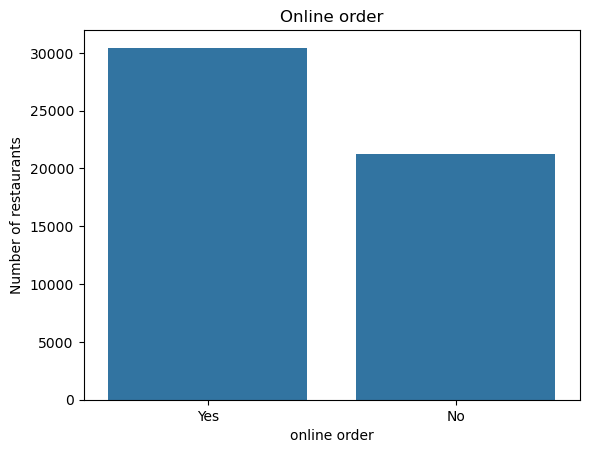

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=df,x='online_order')
plt.title('Online order')
plt.xlabel('online order')
plt.ylabel('Number of restaurants')
plt.show()

#How many restaurants offer online orders vs not.
#Whether online ordering is the dominant mode in Bangalore.

<Axes: ylabel='count'>

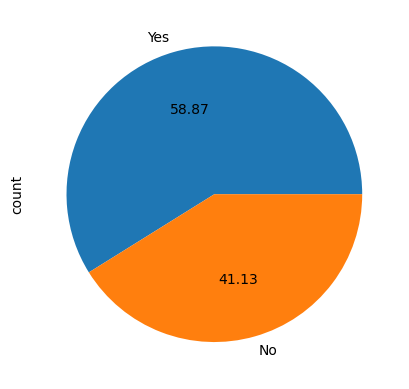

In [30]:
df['online_order'].value_counts().plot(kind='pie',autopct='%.2f')

__book_table__

In [32]:
df['book_table'].value_counts()


book_table
No     45268
Yes     6449
Name: count, dtype: int64

In [33]:
df['book_table'].value_counts(normalize=True)*100

book_table
No     87.530213
Yes    12.469787
Name: proportion, dtype: float64

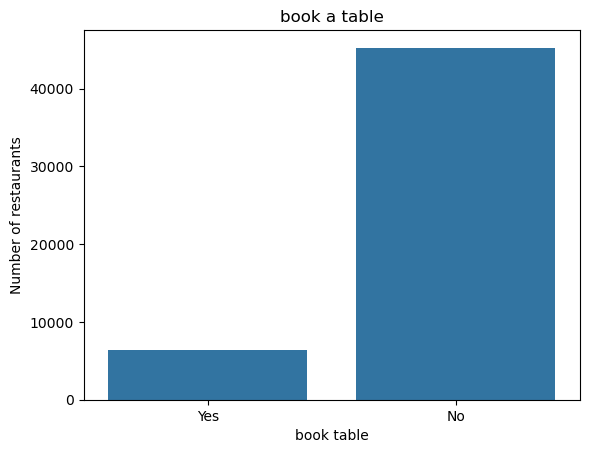

In [34]:
sns.countplot(data=df,x='book_table')
plt.title('book a table')
plt.xlabel('book table')
plt.ylabel('Number of restaurants')
plt.show()

#How common table booking is in Bangalore restaurants.
#Whether it’s a premium or rare service.

<Axes: ylabel='count'>

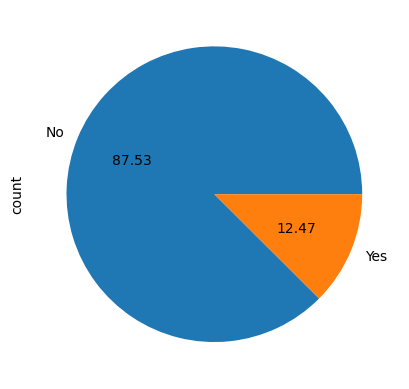

In [35]:
df['book_table'].value_counts().plot(kind='pie',autopct='%.2f')

__rate__

In [37]:
print(df['rate'].unique())

['4.1/5' '3.8/5' '3.7/5' '3.6/5' '4.6/5' '4.0/5' '4.2/5' '3.9/5' '3.1/5'
 '3.0/5' '3.2/5' '3.3/5' '2.8/5' '4.4/5' '4.3/5' 'NEW' '2.9/5' '3.5/5' nan
 '2.6/5' '3.8 /5' '3.4/5' '4.5/5' '2.5/5' '2.7/5' '4.7/5' '2.4/5' '2.2/5'
 '2.3/5' '3.4 /5' '-' '3.6 /5' '4.8/5' '3.9 /5' '4.2 /5' '4.0 /5' '4.1 /5'
 '3.7 /5' '3.1 /5' '2.9 /5' '3.3 /5' '2.8 /5' '3.5 /5' '2.7 /5' '2.5 /5'
 '3.2 /5' '2.6 /5' '4.5 /5' '4.3 /5' '4.4 /5' '4.9/5' '2.1/5' '2.0/5'
 '1.8/5' '4.6 /5' '4.9 /5' '3.0 /5' '4.8 /5' '2.3 /5' '4.7 /5' '2.4 /5'
 '2.1 /5' '2.2 /5' '2.0 /5' '1.8 /5']


In [38]:
import numpy as np
df['rate']=df['rate'].replace(['NEW','-','','nan'],np.nan)
df['rate']=df['rate'].str.extract(r'(\d+\.\d+)')
df['rate']=df['rate'].astype(float)

In [39]:
print(df['rate'].head())
print(df['rate'].isna().sum())

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64
10052


In [40]:
df['rate'].describe()

count    41665.000000
mean         3.700449
std          0.440513
min          1.800000
25%          3.400000
50%          3.700000
75%          4.000000
max          4.900000
Name: rate, dtype: float64

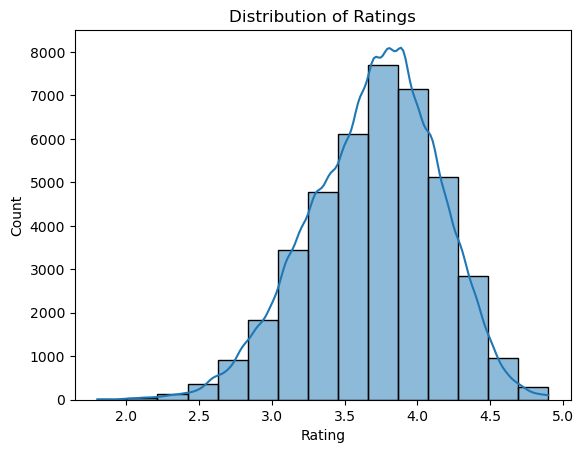

In [41]:
sns.histplot(df['rate'],bins=15,kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.show()

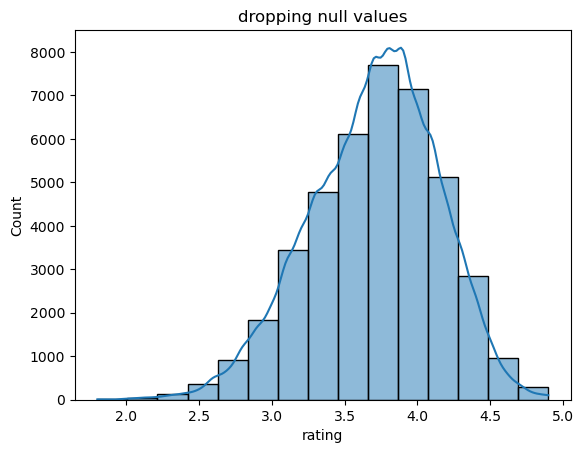

In [42]:
sns.histplot(df['rate'].dropna(),bins=15,kde=True)
plt.title('dropping null values')
plt.xlabel('rating')
plt.show()

C:\Users\sumed\AppData\Local\Temp\ipykernel_30456\464752516.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['rate'])


<Axes: xlabel='rate', ylabel='Density'>

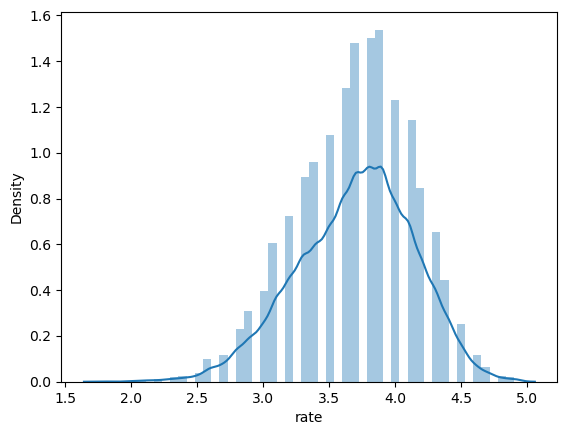

In [43]:
sns.distplot(df['rate'])

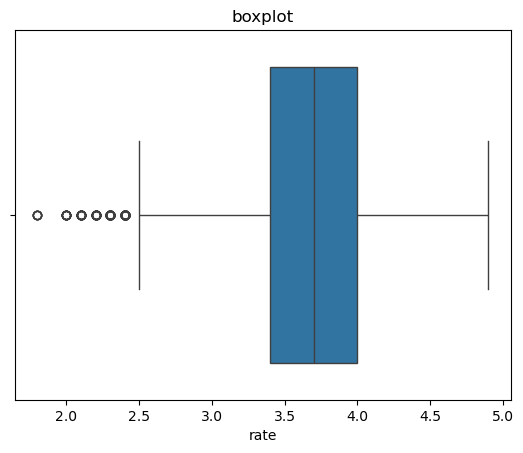

In [44]:
sns.boxplot(x=df['rate'])
plt.title('boxplot')
plt.show()

#Typical rating range for restaurants.
#Outliers or suspicious ratings.
#Overall distribution shape.

In [45]:
df['rate'].min()

1.8

In [46]:
df['rate'].max()

4.9

In [47]:
df['rate'].mean()

3.700448817952718

In [48]:
df['rate'].median()

3.7

In [49]:
df['rate'].skew()

-0.32860079817829163

__votes__

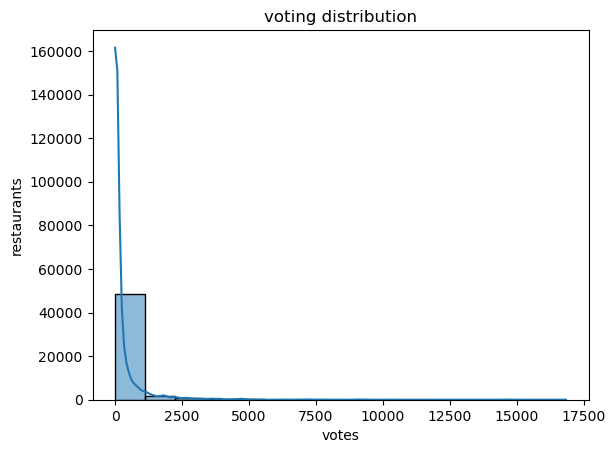

In [51]:
sns.histplot(df['votes'],bins=15,kde=True)
plt.xlabel('votes')
plt.ylabel('restaurants')
plt.title('voting distribution')
plt.show()

In [52]:
df['votes'].skew()

7.547819350060049

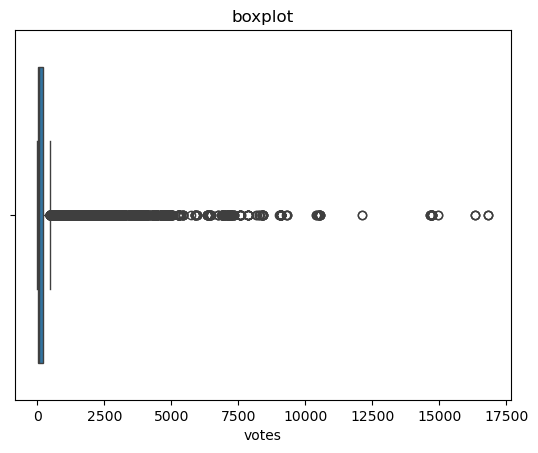

In [53]:
sns.boxplot(x=df['votes'])
plt.title('boxplot')
plt.show()

#How many restaurants have very high vs low user votes.
#Whether vote counts are skewed (they usually are!).
#Outliers that might be big chains or anomalies.

__location__

In [55]:
df['location'].value_counts().head(10)

location
BTM                      5124
HSR                      2523
Koramangala 5th Block    2504
JP Nagar                 2235
Whitefield               2144
Indiranagar              2083
Jayanagar                1926
Marathahalli             1846
Bannerghatta Road        1630
Bellandur                1286
Name: count, dtype: int64

In [56]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', nan, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan 

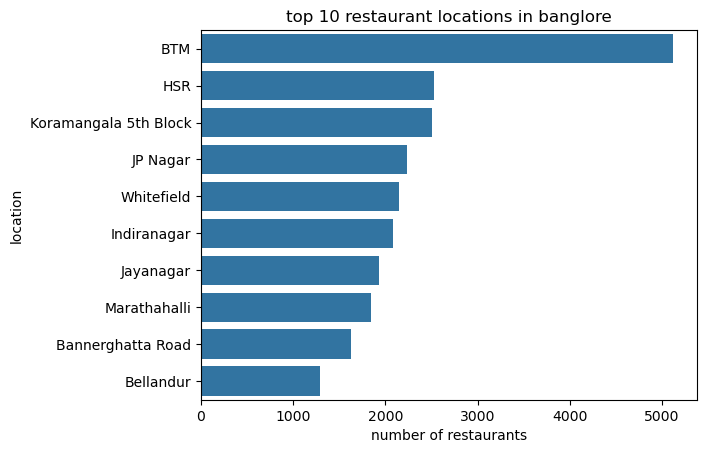

In [57]:
top_locations=df['location'].value_counts().head(10)

sns.barplot(x=top_locations,y=top_locations.index)
plt.xlabel('number of restaurants')
plt.ylabel('location')
plt.title('top 10 restaurant locations in banglore')
plt.show()
#Which areas have the most restaurants.
#How restaurant distribution varies across Bangalore.
#You can later use this for group-wise analysis (e.g., rating by location).

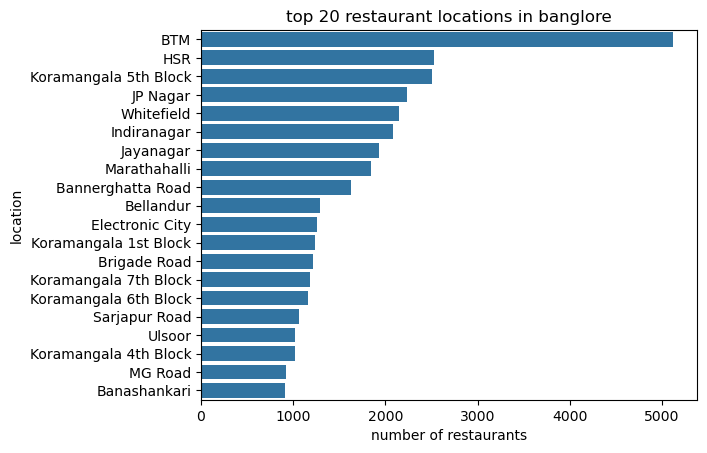

In [58]:
top_20_locations=df['location'].value_counts().head(20)

sns.barplot(x=top_20_locations,y=top_20_locations.index)
plt.xlabel('number of restaurants')
plt.ylabel('location')
plt.title('top 20 restaurant locations in banglore')
plt.show()

__Rest_type__

In [60]:
df['rest_type'].value_counts().head(15)

rest_type
Quick Bites           19132
Casual Dining         10330
Cafe                   3732
Delivery               2604
Dessert Parlor         2263
Takeaway, Delivery     2037
Casual Dining, Bar     1154
Bakery                 1141
Beverage Shop           867
Bar                     697
Food Court              624
Sweet Shop              468
Bar, Casual Dining      425
Lounge                  396
Pub                     357
Name: count, dtype: int64

In [61]:
df['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Pub, Bar', 'Casual Dining, Pub',
      

In [62]:
df['rest_type'].nunique()

93

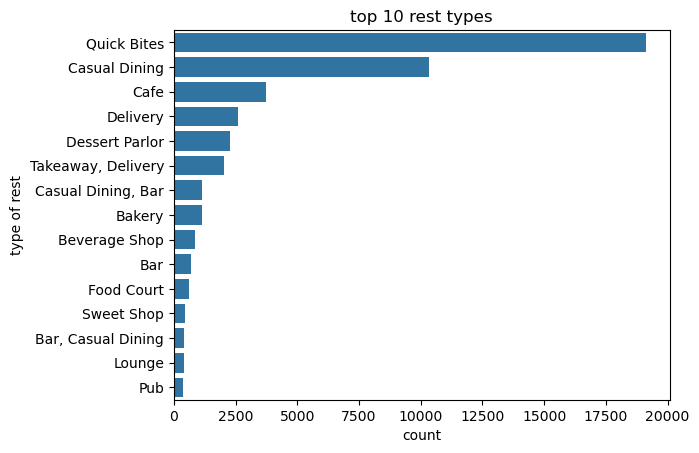

In [63]:
top_Rest_types=df['rest_type'].value_counts().head(15)
sns.barplot(x=top_Rest_types,y=top_Rest_types.index)
plt.title('top 10 rest types')
plt.xlabel('count')
plt.ylabel('type of rest')
plt.show()
#Common formats (like "Casual Dining" vs "Quick Bites").
#Whether Bangalore prefers sit-downs, cafes, or takeouts.
#Useful for further segmentation (like rating per type).

__dish_liked__

In [65]:
df['dish_liked'].isna().sum()

28078

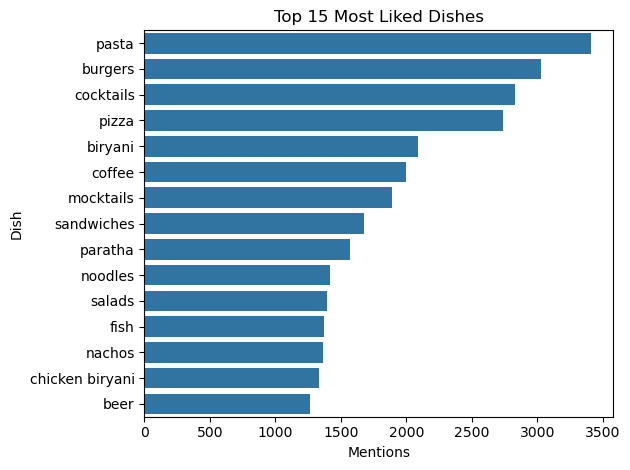

In [66]:
# Drop missing values
dish_data = df['dish_liked'].dropna()

# Combine all dishes into one big string
all_dishes = ', '.join(dish_data)

# Convert to lowercase and split by comma
from collections import Counter
dish_list = [dish.strip().lower() for dish in all_dishes.split(',')]

# Count most common dishes
dish_counter = Counter(dish_list)
common_dishes = dish_counter.most_common(15)

# Convert to DataFrame for plotting
dish_df = pd.DataFrame(common_dishes, columns=['Dish', 'Count'])

# Plot
sns.barplot(data=dish_df, y='Dish', x='Count')
plt.title('Top 15 Most Liked Dishes')
plt.xlabel('Mentions')
plt.ylabel('Dish')
plt.tight_layout()
plt.show()

#Which dishes are mentioned most often as customer favorites.
#Popular food trends in Bangalore.

__cuisines__

In [68]:
df['cuisines'].isna().sum()

45

In [69]:
df['cuisines'].nunique

<bound method IndexOpsMixin.nunique of 0                North Indian, Mughlai, Chinese
1                   Chinese, North Indian, Thai
2                        Cafe, Mexican, Italian
3                    South Indian, North Indian
4                      North Indian, Rajasthani
                          ...                  
51712                               Continental
51713                               Finger Food
51714                               Finger Food
51715                               Finger Food
51716    Finger Food, North Indian, Continental
Name: cuisines, Length: 51717, dtype: object>

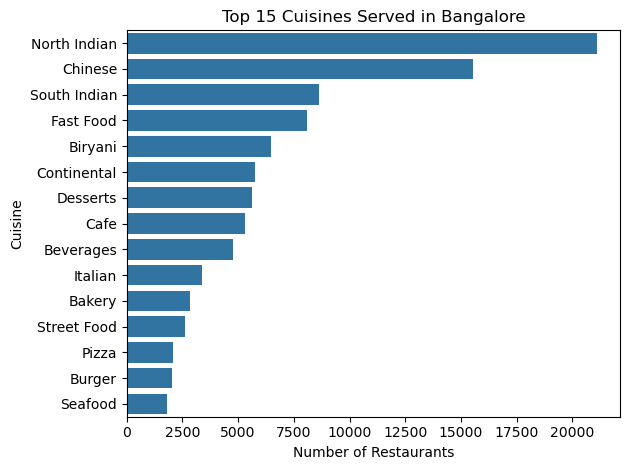

In [70]:
# Drop missing values
cuisine_data = df['cuisines'].dropna()

# Join all into one string, split, and clean
from collections import Counter

cuisine_list = [c.strip() for entry in cuisine_data for c in entry.split(',')]
cuisine_counter = Counter(cuisine_list)
top_cuisines = cuisine_counter.most_common(15)

# Convert to DataFrame
cuisine_df = pd.DataFrame(top_cuisines, columns=['Cuisine', 'Count'])

# Plot
sns.barplot(data=cuisine_df, y='Cuisine', x='Count')
plt.title('Top 15 Cuisines Served in Bangalore')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine')
plt.tight_layout()
plt.show()


#Most frequently offered cuisines.
#Whether the market leans more toward Indian, Chinese, or global cuisines.

__Approx for two__

In [72]:
df['approx_cost(for two people)'].describe()

count     51371
unique       70
top         300
freq       7576
Name: approx_cost(for two people), dtype: object

In [73]:
df['approx_cost(for two people)'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 51717 entries, 0 to 51716
Series name: approx_cost(for two people)
Non-Null Count  Dtype 
--------------  ----- 
51371 non-null  object
dtypes: object(1)
memory usage: 404.2+ KB


In [74]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [75]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].str.replace(',','',regex=False)

In [76]:
df['approx_cost(for two people)']=pd.to_numeric(df['approx_cost(for two people)'],errors='coerce')

In [77]:
df['approx_cost(for two people)'].describe()

count    51371.000000
mean       555.431566
std        438.850728
min         40.000000
25%        300.000000
50%        400.000000
75%        650.000000
max       6000.000000
Name: approx_cost(for two people), dtype: float64

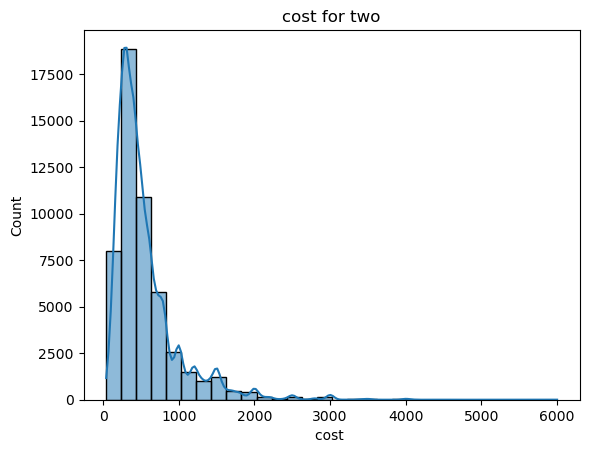

In [78]:
sns.histplot(df['approx_cost(for two people)'],bins=30,kde=True)
plt.xlabel('cost ')
plt.title('cost for two')
plt.show()

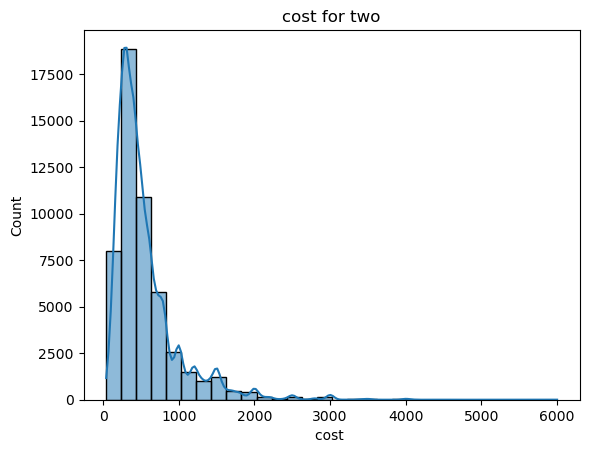

In [79]:
sns.histplot(df['approx_cost(for two people)'].dropna(),bins=30,kde=True)
plt.xlabel('cost ')
plt.title('cost for two')
plt.show()

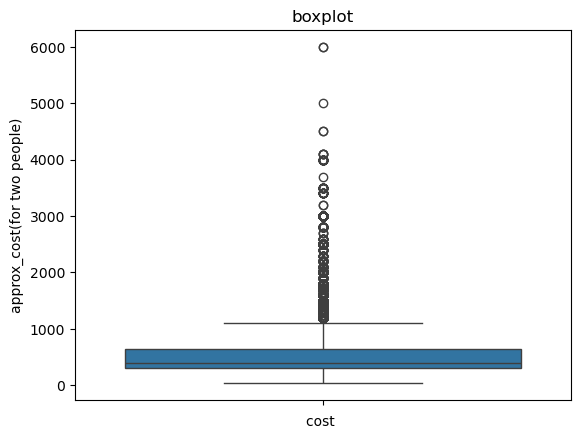

In [80]:
sns.boxplot(df['approx_cost(for two people)'].dropna())
plt.xlabel('cost ')
plt.title('boxplot')
plt.show()

#Typical restaurant cost in Bangalore.
#Outlier detection (very expensive places).
#Helps categorize restaurants as budget/fine dining later.

__listed_in__

In [82]:
df['listed_in(type)'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [83]:
df['listed_in(type)'].value_counts()

listed_in(type)
Delivery              25942
Dine-out              17779
Desserts               3593
Cafes                  1723
Drinks & nightlife     1101
Buffet                  882
Pubs and bars           697
Name: count, dtype: int64

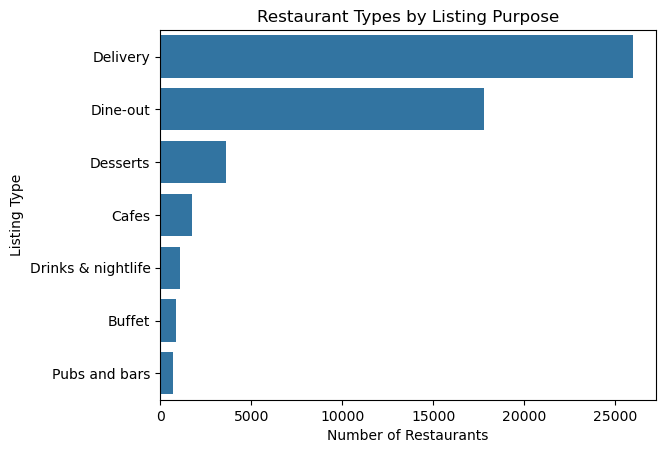

In [84]:
sns.countplot( data=df,y='listed_in(type)', order=df['listed_in(type)'].value_counts().index)
plt.title('Restaurant Types by Listing Purpose')
plt.xlabel('Number of Restaurants')
plt.ylabel('Listing Type')
plt.show()
#Whether Bangalore leans more toward food delivery or dine-in.
#Popularity of cafés, buffets, etc.

__listed_in(city)__

In [86]:
df['listed_in(city)'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [87]:
df['listed_in(city)'].value_counts()

listed_in(city)
BTM                      3279
Koramangala 7th Block    2938
Koramangala 5th Block    2836
Koramangala 4th Block    2779
Koramangala 6th Block    2623
Jayanagar                2371
JP Nagar                 2096
Indiranagar              1860
Church Street            1827
MG Road                  1811
Brigade Road             1769
Lavelle Road             1744
HSR                      1741
Marathahalli             1659
Residency Road           1620
Whitefield               1620
Bannerghatta Road        1617
Brookefield              1518
Old Airport Road         1425
Kammanahalli             1329
Kalyan Nagar             1309
Basavanagudi             1266
Sarjapur Road            1261
Electronic City          1229
Bellandur                1227
Frazer Town              1185
Malleshwaram             1096
Rajajinagar              1079
Banashankari              863
New BEL Road              740
Name: count, dtype: int64

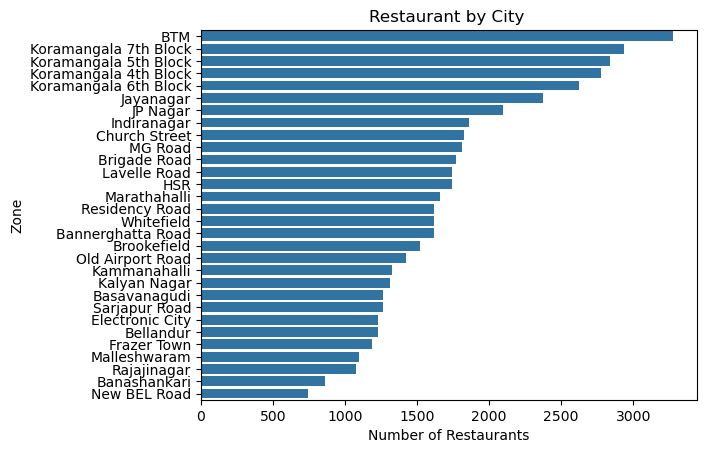

In [88]:
sns.countplot( data=df,y='listed_in(city)', order=df['listed_in(city)'].value_counts().index)
plt.title('Restaurant by City ')
plt.xlabel('Number of Restaurants')
plt.ylabel('Zone')
plt.show()

#Which zones are most active on Zomato.
#Which areas dominate in terms of restaurant density.

__bivariate analysis__

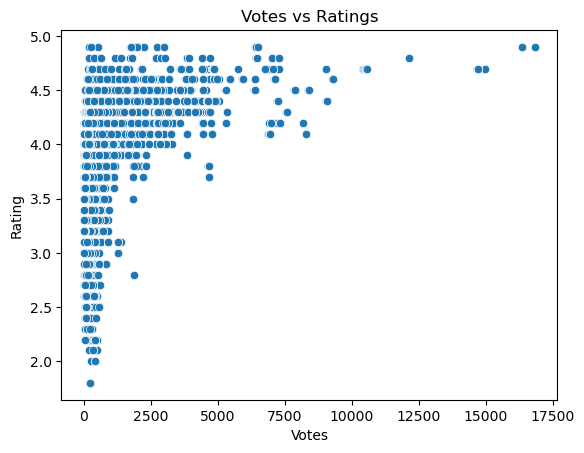

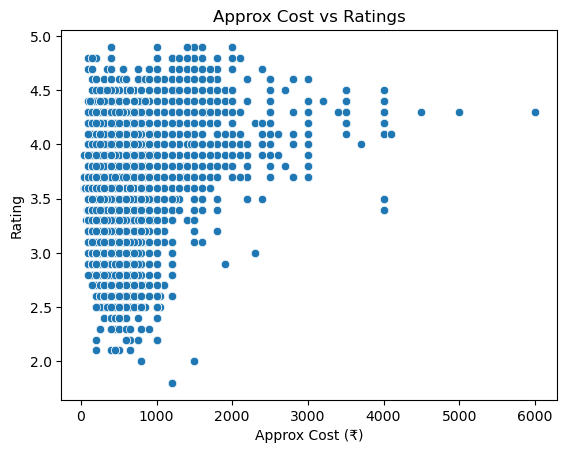

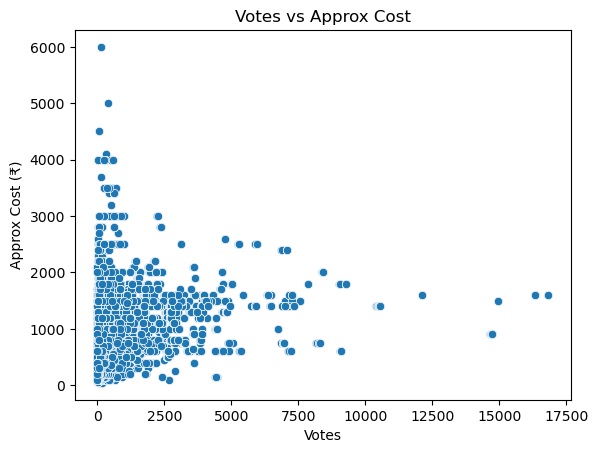

Correlation matrix:
                                  rate     votes  approx_cost(for two people)
rate                         1.000000  0.434040                     0.385183
votes                        0.434040  1.000000                     0.381804
approx_cost(for two people)  0.385183  0.381804                     1.000000


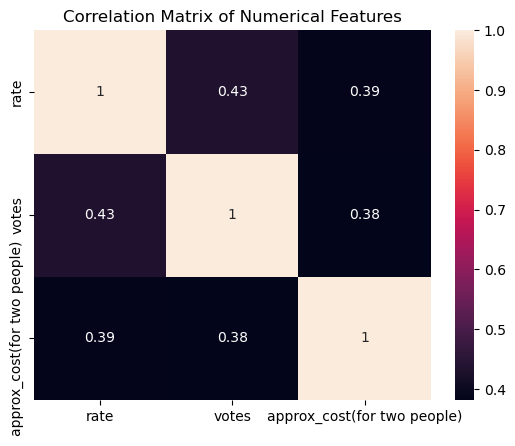

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pair 1: votes vs rate_cleaned
sns.scatterplot(x='votes', y='rate', data=df)
plt.title('Votes vs Ratings')
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.show()

# Pair 2: approx_cost vs rate_cleaned
sns.scatterplot(x='approx_cost(for two people)', y='rate', data=df)
plt.title('Approx Cost vs Ratings')
plt.xlabel('Approx Cost (₹)')
plt.ylabel('Rating')
plt.show()

# Pair 3: votes vs approx_cost
sns.scatterplot(x='votes', y='approx_cost(for two people)', data=df)
plt.title('Votes vs Approx Cost')
plt.xlabel('Votes')
plt.ylabel('Approx Cost (₹)')
plt.show()

# Correlation matrix
corr = df[['rate', 'votes', 'approx_cost(for two people)']].corr()
print("Correlation matrix:\n", corr)

# Optional: heatmap of correlation
sns.heatmap(corr, annot=True)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


__rating with categorical columns__

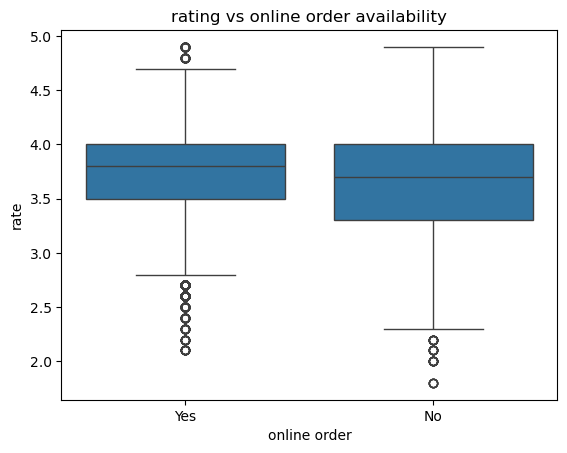

In [92]:
sns.boxplot(x='online_order',y='rate',data=df)
plt.xlabel('online order')
plt.ylabel('rate')
plt.title('rating vs online order availability')
plt.show()

median of online order is more

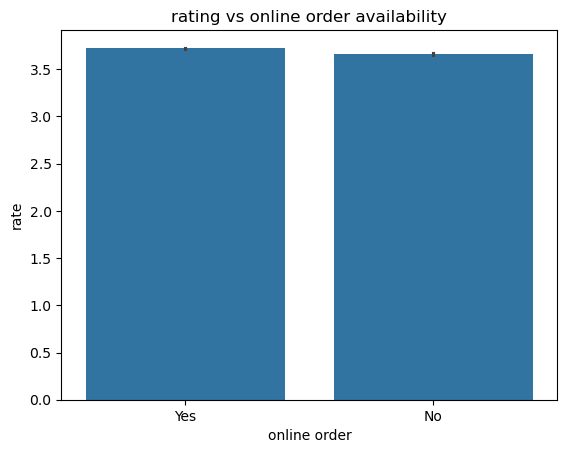

In [94]:
sns.barplot(x='online_order',y='rate',data=df)
plt.xlabel('online order')
plt.ylabel('rate')
plt.title('rating vs online order availability')
plt.show()

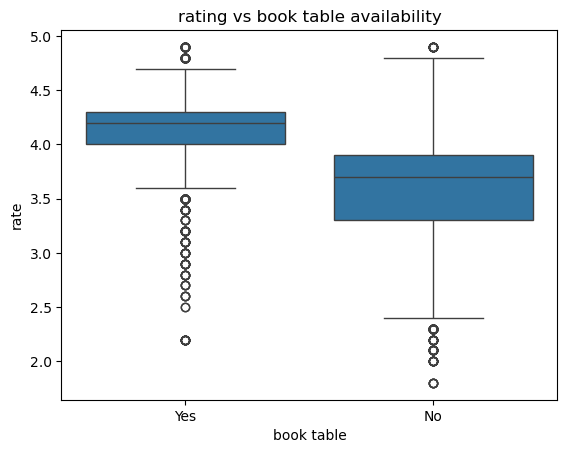

In [95]:
sns.boxplot(x='book_table',y='rate',data=df)
plt.xlabel('book table')
plt.ylabel('rate')
plt.title('rating vs book table availability')
plt.show()

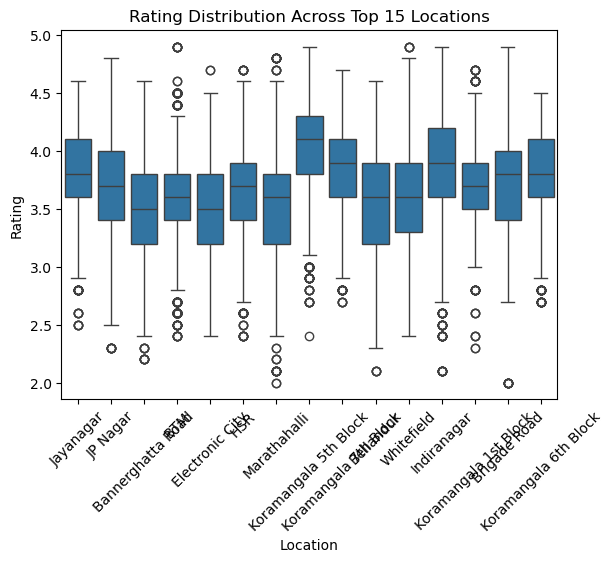

In [96]:
top_location=df['location'].value_counts().head(15).index
sns.boxplot(x='location',y='rate',data=df[df['location'].isin(top_location)])
plt.xticks(rotation=45)
plt.title('Rating Distribution Across Top 15 Locations')
plt.xlabel('Location')
plt.ylabel('Rating')
plt.show()

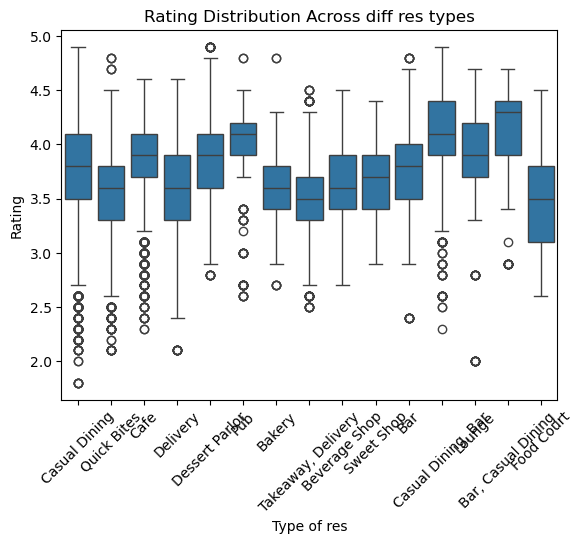

In [97]:
top_res_type=df['rest_type'].value_counts().head(15).index
sns.boxplot(x='rest_type',y='rate',data=df[df['rest_type'].isin(top_res_type)])
plt.xticks(rotation=45)
plt.title('Rating Distribution Across diff res types')
plt.xlabel('Type of res')
plt.ylabel('Rating')
plt.show()

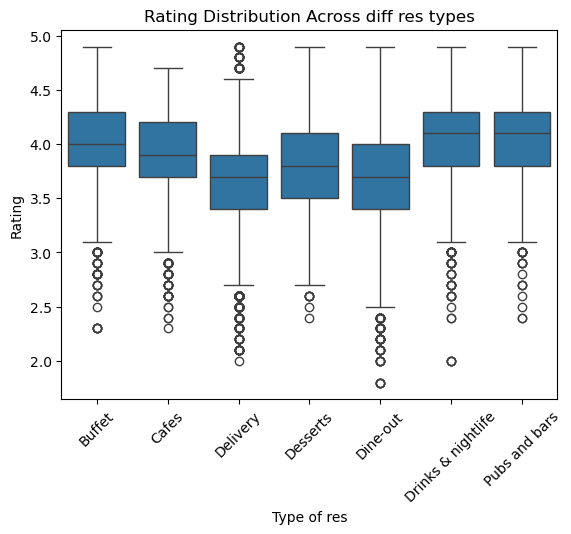

In [98]:
top_type=df['listed_in(type)'].value_counts().head(15).index
sns.boxplot(x='listed_in(type)',y='rate',data=df[df['listed_in(type)'].isin(top_type)])
plt.xticks(rotation=45)
plt.title('Rating Distribution Across diff res types')
plt.xlabel('Type of res')
plt.ylabel('Rating')
plt.show()

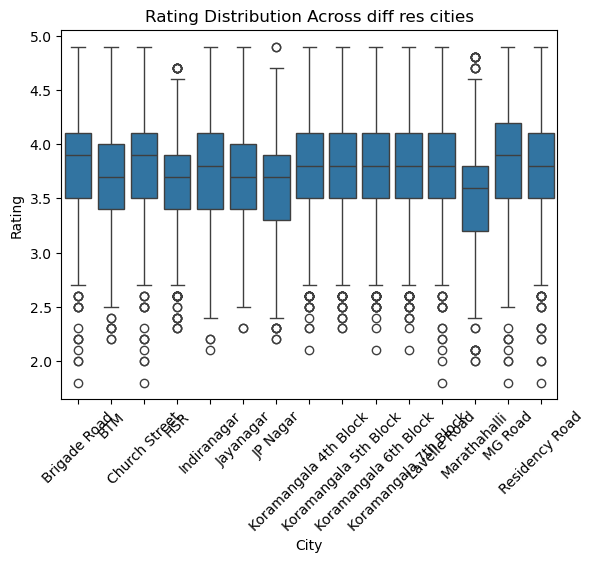

In [99]:
top_city=df['listed_in(city)'].value_counts().head(15).index
sns.boxplot(x='listed_in(city)',y='rate',data=df[df['listed_in(city)'].isin(top_city)])
plt.xticks(rotation=45)
plt.title('Rating Distribution Across diff res cities')
plt.xlabel('City')
plt.ylabel('Rating')
plt.show()

__votes with categorical columns__

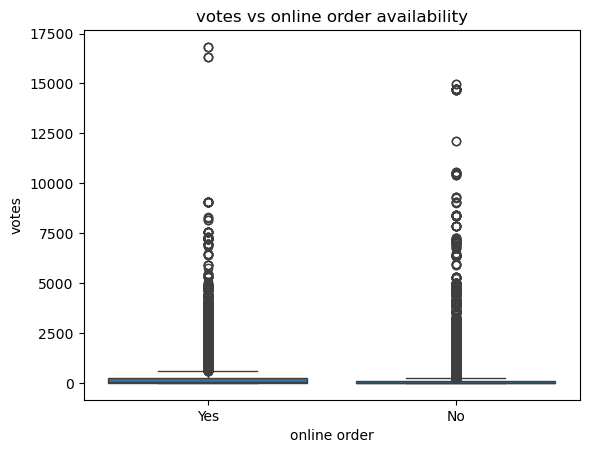

In [101]:
sns.boxplot(x='online_order',y='votes',data=df)
plt.xlabel('online order')
plt.ylabel('votes')
plt.title('votes vs online order availability')
plt.show()

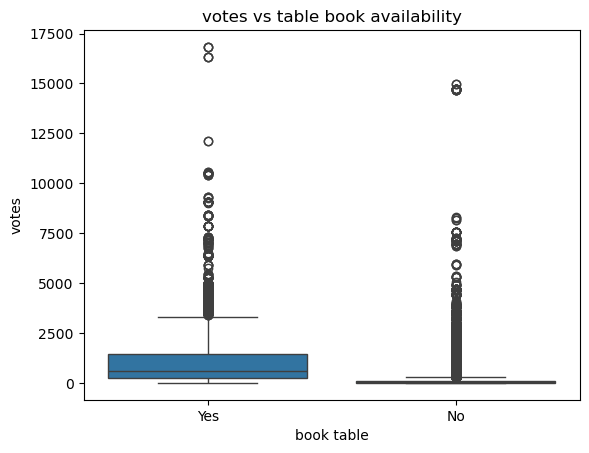

In [102]:
sns.boxplot(x='book_table',y='votes',data=df)
plt.xlabel('book table')
plt.ylabel('votes')
plt.title('votes vs table book availability')
plt.show()

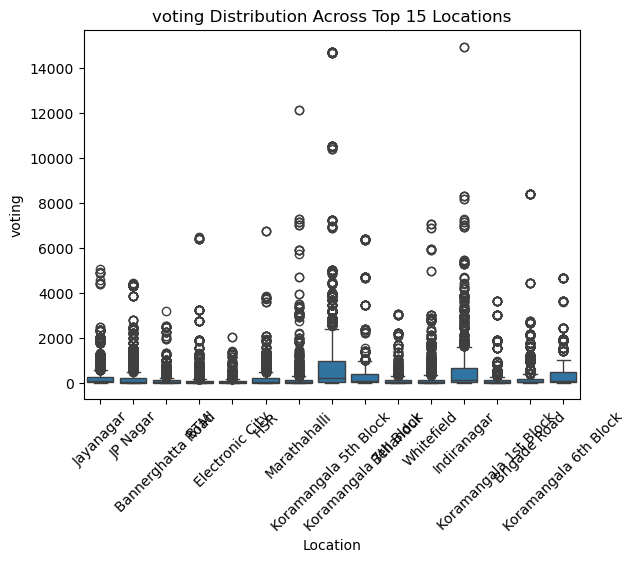

In [103]:
top_location=df['location'].value_counts().head(15).index
sns.boxplot(x='location',y='votes',data=df[df['location'].isin(top_location)])
plt.xticks(rotation=45)
plt.title('voting Distribution Across Top 15 Locations')
plt.xlabel('Location')
plt.ylabel('voting')
plt.show()

__approx cost with categorical columns__

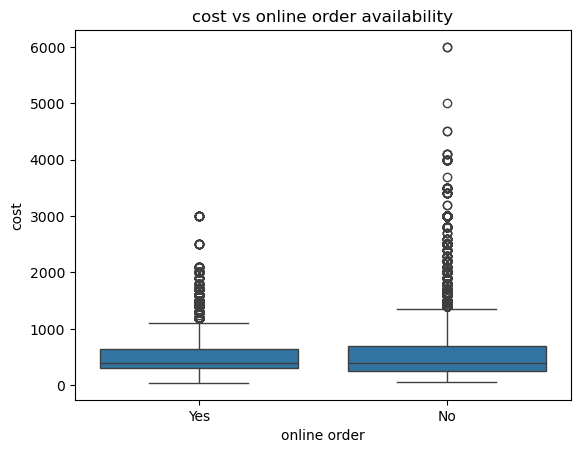

In [105]:
sns.boxplot(x='online_order',y='approx_cost(for two people)',data=df)
plt.xlabel('online order')
plt.ylabel('cost')
plt.title('cost vs online order availability')
plt.show()

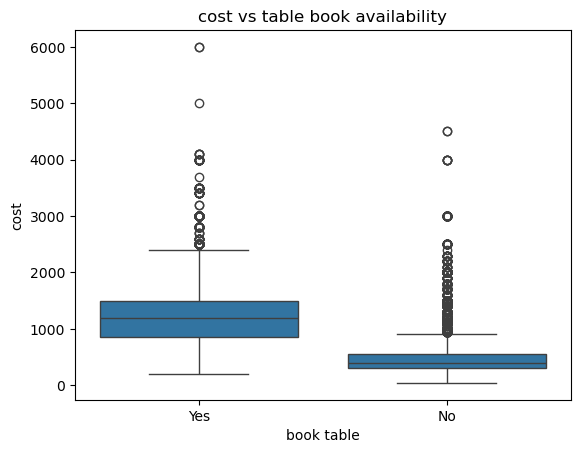

In [106]:
sns.boxplot(x='book_table',y='approx_cost(for two people)',data=df)
plt.xlabel('book table')
plt.ylabel('cost')
plt.title('cost vs table book availability')
plt.show()

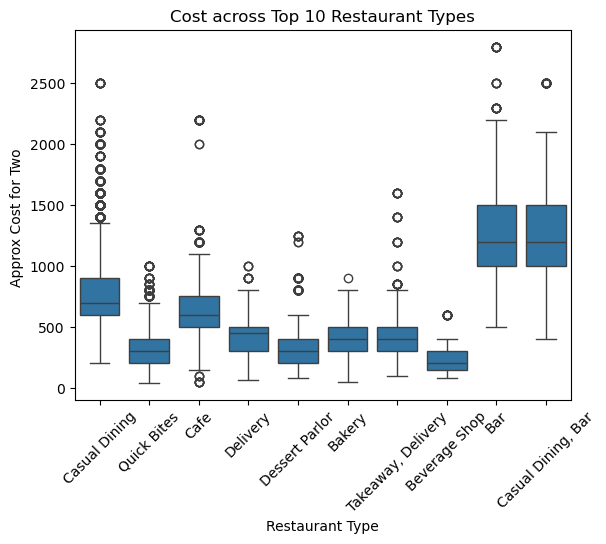

In [107]:
top_types = df['rest_type'].value_counts().head(10).index
sns.boxplot(x='rest_type', y='approx_cost(for two people)', data=df[df['rest_type'].isin(top_types)])
plt.xticks(rotation=45)
plt.title('Cost across Top 10 Restaurant Types')
plt.xlabel('Restaurant Type')
plt.ylabel('Approx Cost for Two ')
plt.show()


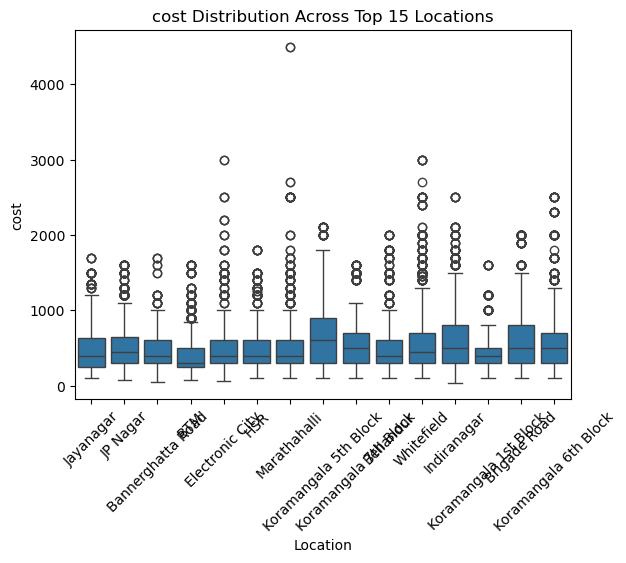

In [108]:
top_location=df['location'].value_counts().head(15).index
sns.boxplot(x='location',y='approx_cost(for two people)',data=df[df['location'].isin(top_location)])
plt.xticks(rotation=45)
plt.title('cost Distribution Across Top 15 Locations')
plt.xlabel('Location')
plt.ylabel('cost')
plt.show()

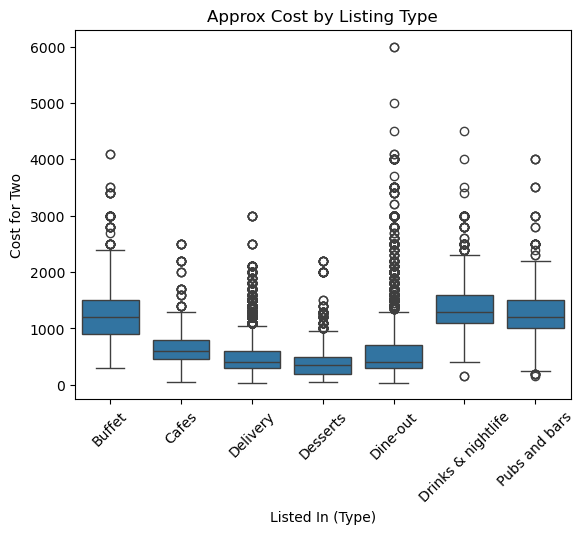

In [109]:
sns.boxplot(x='listed_in(type)', y='approx_cost(for two people)', data=df)
plt.title('Approx Cost by Listing Type')
plt.xlabel('Listed In (Type)')
plt.ylabel('Cost for Two')
plt.xticks(rotation=45)
plt.show()


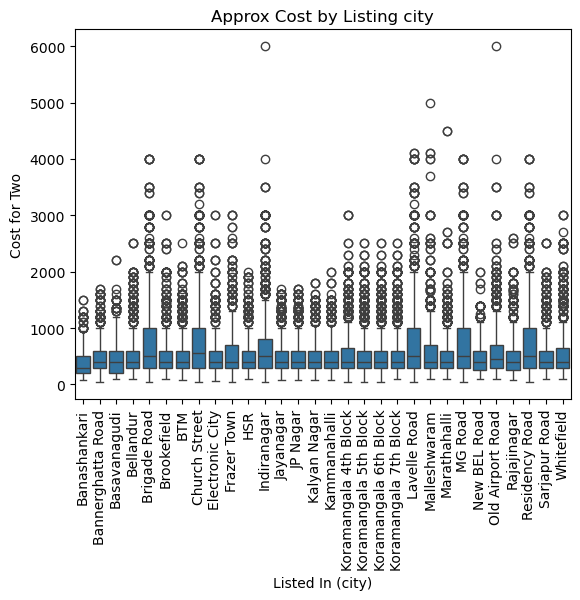

In [110]:
sns.boxplot(x='listed_in(city)', y='approx_cost(for two people)', data=df)
plt.title('Approx Cost by Listing city')
plt.xlabel('Listed In (city)')
plt.ylabel('Cost for Two')
plt.xticks(rotation=90)
plt.show()


In [111]:
pd.crosstab(df['online_order'],df['book_table'])

book_table,No,Yes
online_order,,
No,18629,2644
Yes,26639,3805


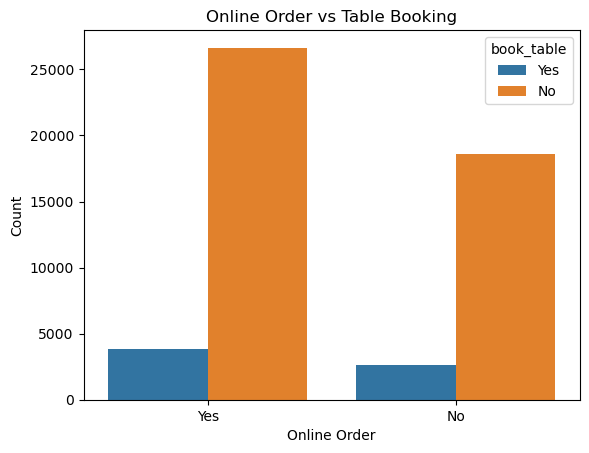

In [112]:
sns.countplot(x='online_order', hue='book_table', data=df)
plt.title('Online Order vs Table Booking')
plt.xlabel('Online Order')
plt.ylabel('Count')
plt.show()


In [113]:
pd.crosstab(df['listed_in(type)'], df['online_order'])


online_order,No,Yes
listed_in(type),,
Buffet,528,354
Cafes,825,898
Delivery,7071,18871
Desserts,1944,1649
Dine-out,9534,8245
Drinks & nightlife,864,237
Pubs and bars,507,190


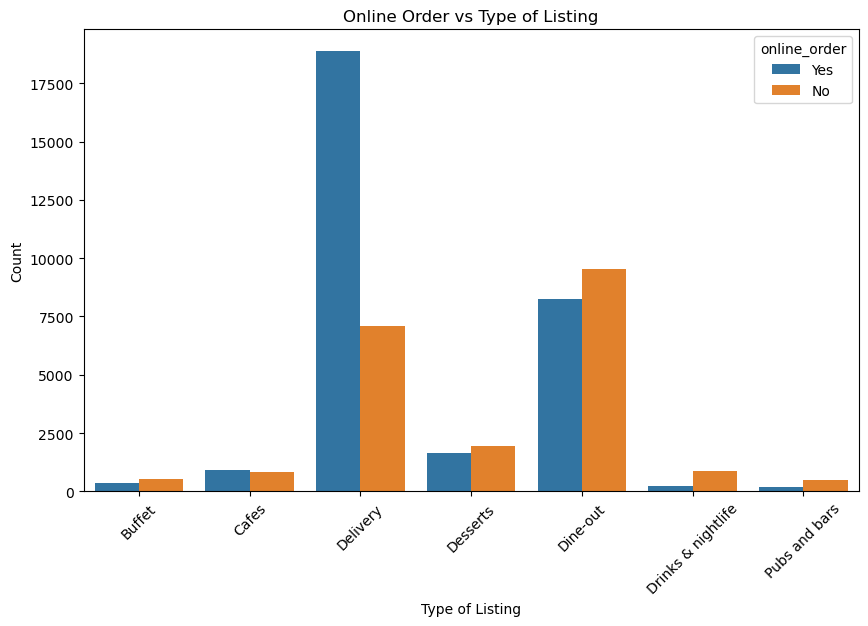

In [114]:
plt.figure(figsize=(10,6))
sns.countplot(x='listed_in(type)', hue='online_order', data=df)
plt.title('Online Order vs Type of Listing')
plt.xlabel('Type of Listing')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [115]:
pd.crosstab(df['location'], df['online_order'])


online_order,No,Yes
location,,
BTM,1792,3332
Banashankari,397,509
Banaswadi,321,343
Bannerghatta Road,706,924
Basavanagudi,243,441
...,...,...
West Bangalore,4,2
Whitefield,1005,1139
Wilson Garden,112,134


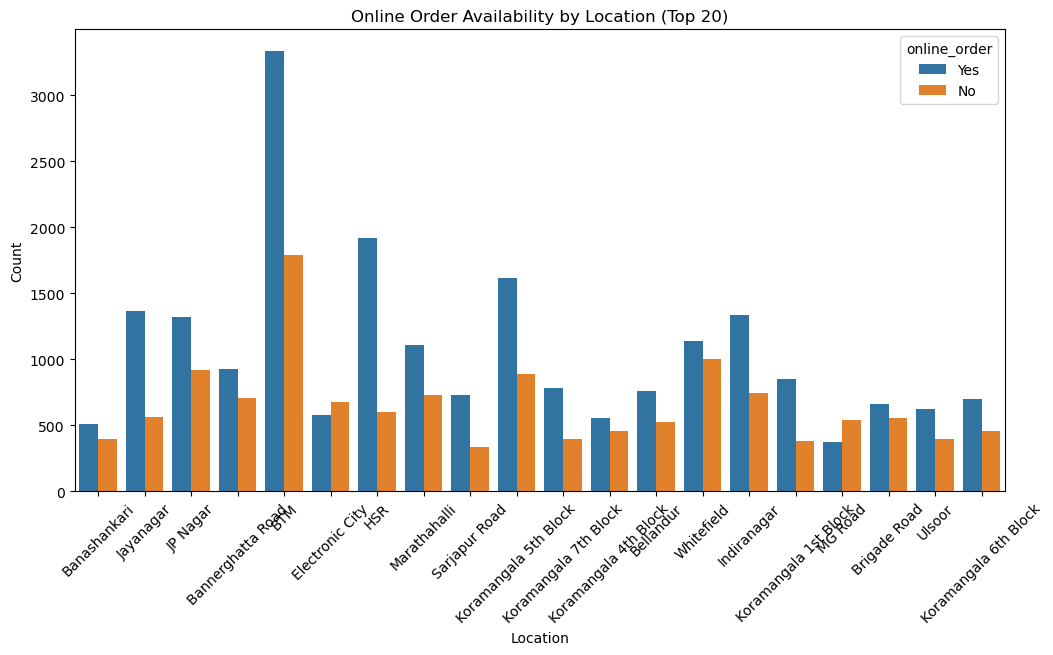

In [116]:
top_locations = df['location'].value_counts().index[:20]
plt.figure(figsize=(12,6))
sns.countplot(x='location', hue='online_order', data=df[df['location'].isin(top_locations)])
plt.title('Online Order Availability by Location (Top 20)')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [117]:
pd.crosstab(df['rest_type'], df['online_order'])


online_order,No,Yes
rest_type,,
Bakery,614,527
"Bakery, Beverage Shop",15,1
"Bakery, Cafe",22,56
"Bakery, Dessert Parlor",82,65
"Bakery, Food Court",1,1
...,...,...
Sweet Shop,208,260
"Sweet Shop, Dessert Parlor",1,0
"Sweet Shop, Quick Bites",78,100


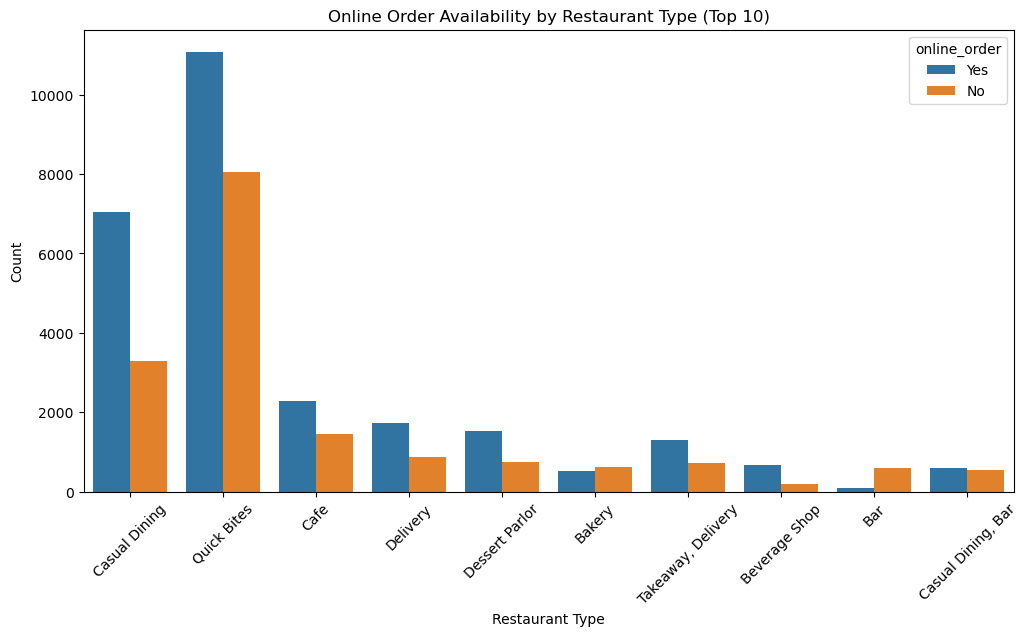

In [118]:
top_rest_types = df['rest_type'].value_counts().index[:10]
plt.figure(figsize=(12,6))
sns.countplot(x='rest_type', hue='online_order', data=df[df['rest_type'].isin(top_rest_types)])
plt.title('Online Order Availability by Restaurant Type (Top 10)')
plt.xlabel('Restaurant Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [119]:
pd.crosstab(df['rest_type'], df['book_table'])


book_table,No,Yes
rest_type,,
Bakery,1141,0
"Bakery, Beverage Shop",16,0
"Bakery, Cafe",74,4
"Bakery, Dessert Parlor",147,0
"Bakery, Food Court",2,0
...,...,...
Sweet Shop,468,0
"Sweet Shop, Dessert Parlor",1,0
"Sweet Shop, Quick Bites",178,0


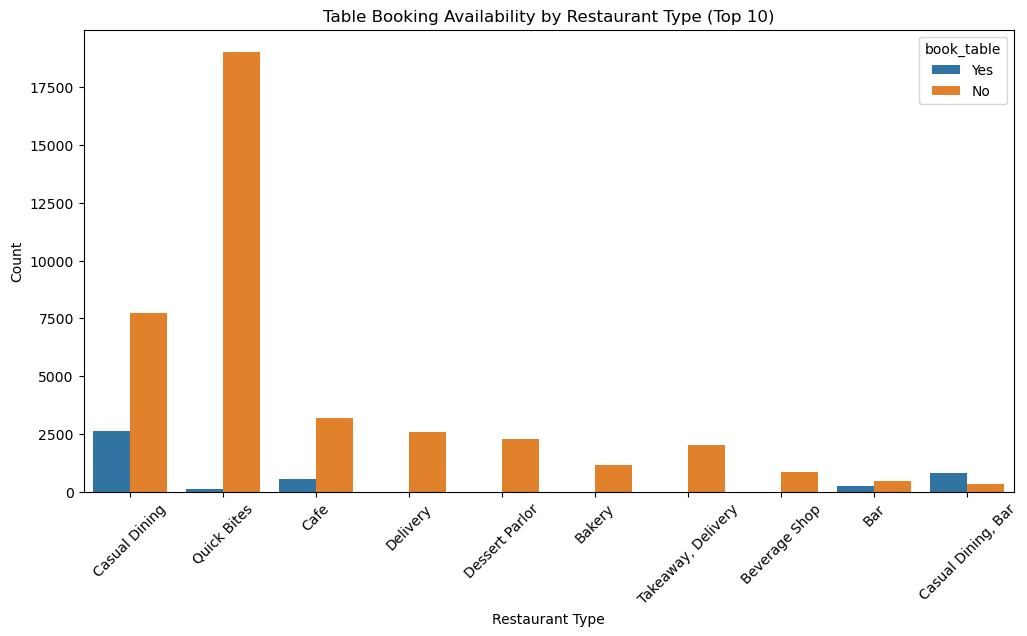

In [120]:
top_rest_types = df['rest_type'].value_counts().index[:10]
plt.figure(figsize=(12,6))
sns.countplot(x='rest_type', hue='book_table', data=df[df['rest_type'].isin(top_rest_types)])
plt.title('Table Booking Availability by Restaurant Type (Top 10)')
plt.xlabel('Restaurant Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [121]:
pd.crosstab(df['location'], df['rest_type'])


rest_type,Bakery,"Bakery, Beverage Shop","Bakery, Cafe","Bakery, Dessert Parlor","Bakery, Food Court","Bakery, Kiosk","Bakery, Quick Bites","Bakery, Sweet Shop",Bar,"Bar, Cafe",...,"Quick Bites, Food Court","Quick Bites, Kiosk","Quick Bites, Meat Shop","Quick Bites, Mess","Quick Bites, Sweet Shop",Sweet Shop,"Sweet Shop, Dessert Parlor","Sweet Shop, Quick Bites",Takeaway,"Takeaway, Delivery"
location,,,,,,,,,,,,,,,,,,,,,
BTM,77,0,0,0,0,0,11,0,49,0,...,0,0,0,0,18,50,0,26,26,334
Banashankari,20,0,0,2,0,0,0,0,23,0,...,0,0,0,0,0,18,0,5,3,17
Banaswadi,27,0,0,0,0,0,1,0,9,0,...,0,0,0,4,0,2,0,5,0,22
Bannerghatta Road,53,0,0,0,0,0,9,0,0,0,...,0,0,0,0,1,22,0,1,1,60
Basavanagudi,35,0,0,0,0,0,6,0,11,0,...,0,0,0,0,0,6,1,11,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bangalore,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Whitefield,58,0,14,0,0,0,2,0,18,0,...,3,0,0,0,0,27,0,12,4,105
Wilson Garden,6,0,0,0,0,0,0,0,5,0,...,0,0,0,0,0,4,0,3,0,6


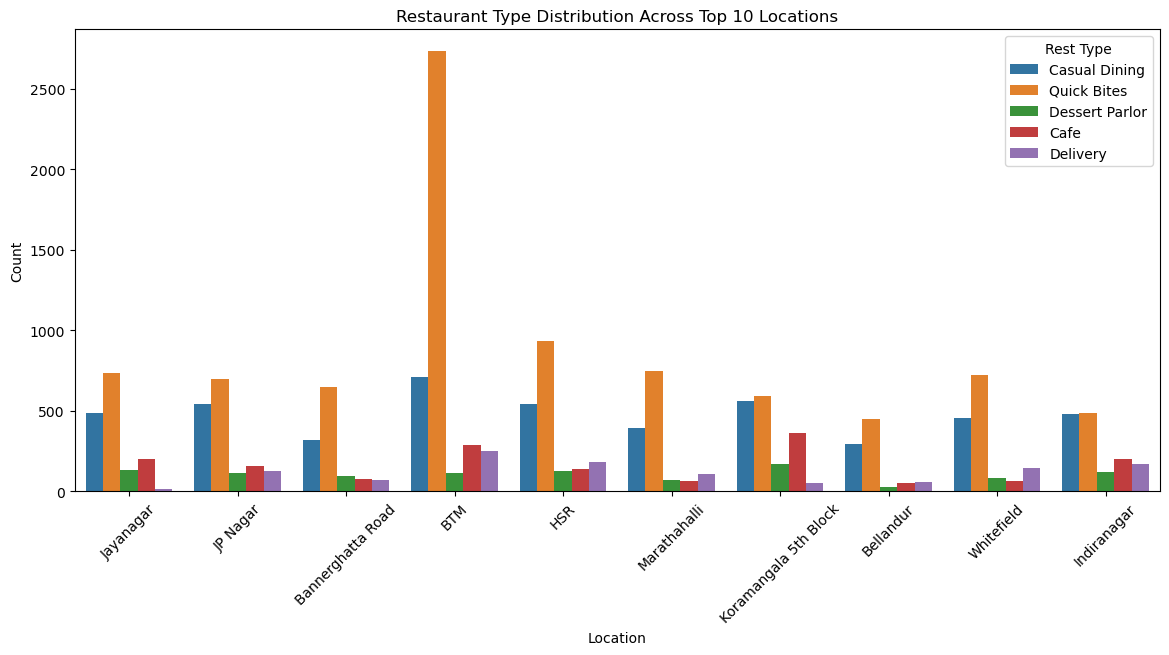

In [122]:
top_locations = df['location'].value_counts().index[:10]
top_rest_types = df['rest_type'].value_counts().index[:5]

filtered_df = df[df['location'].isin(top_locations) & df['rest_type'].isin(top_rest_types)]

plt.figure(figsize=(14,6))
sns.countplot(x='location', hue='rest_type', data=filtered_df)
plt.title('Restaurant Type Distribution Across Top 10 Locations')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Rest Type')
plt.show()


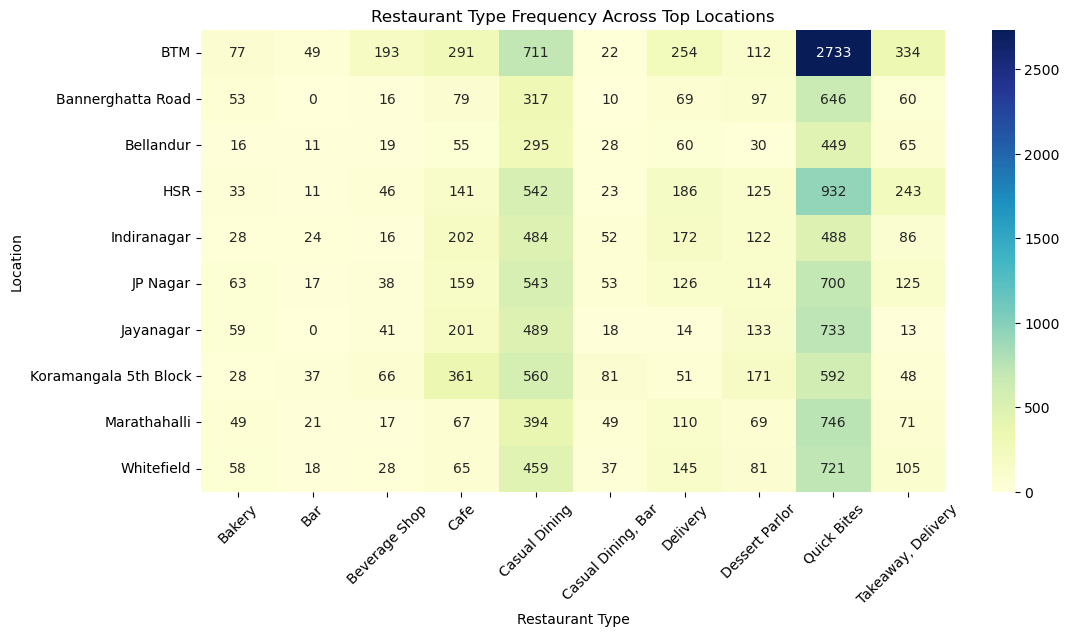

In [123]:
top_locations = df['location'].value_counts().index[:10]
top_rest_types = df['rest_type'].value_counts().index[:10]

# Crosstab
heatmap_data = pd.crosstab(
    df[df['location'].isin(top_locations)]['location'],
    df[df['rest_type'].isin(top_rest_types)]['rest_type']
)

# Plot heatmap
plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Restaurant Type Frequency Across Top Locations')
plt.ylabel('Location')
plt.xlabel('Restaurant Type')
plt.xticks(rotation=45)
plt.show()


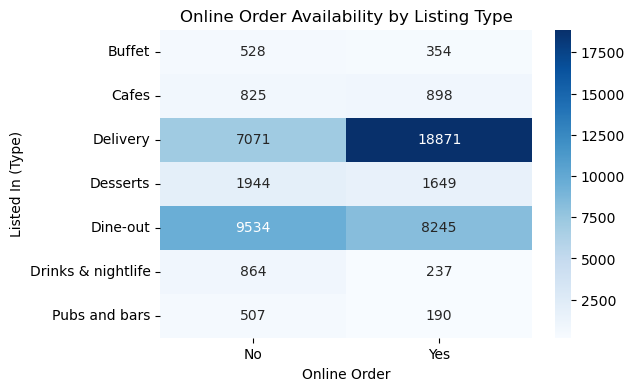

In [124]:
heatmap_data = pd.crosstab(df['listed_in(type)'], df['online_order'])

plt.figure(figsize=(6,4))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='Blues')
plt.title('Online Order Availability by Listing Type')
plt.ylabel('Listed In (Type)')
plt.xlabel('Online Order')
plt.show()


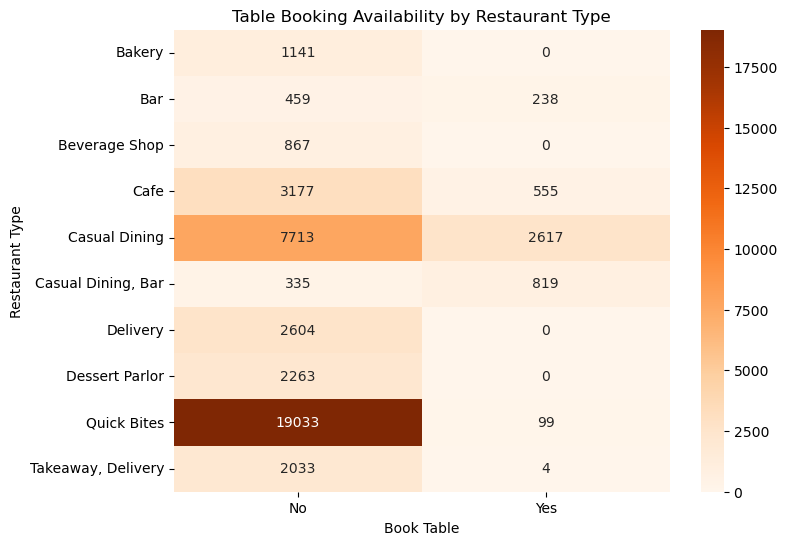

In [125]:
top_rest_types = df['rest_type'].value_counts().index[:10]
heatmap_data = pd.crosstab(
    df[df['rest_type'].isin(top_rest_types)]['rest_type'],
    df['book_table']
)

plt.figure(figsize=(8,6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='Oranges')
plt.title('Table Booking Availability by Restaurant Type')
plt.ylabel('Restaurant Type')
plt.xlabel('Book Table')
plt.xticks(rotation=0)
plt.show()


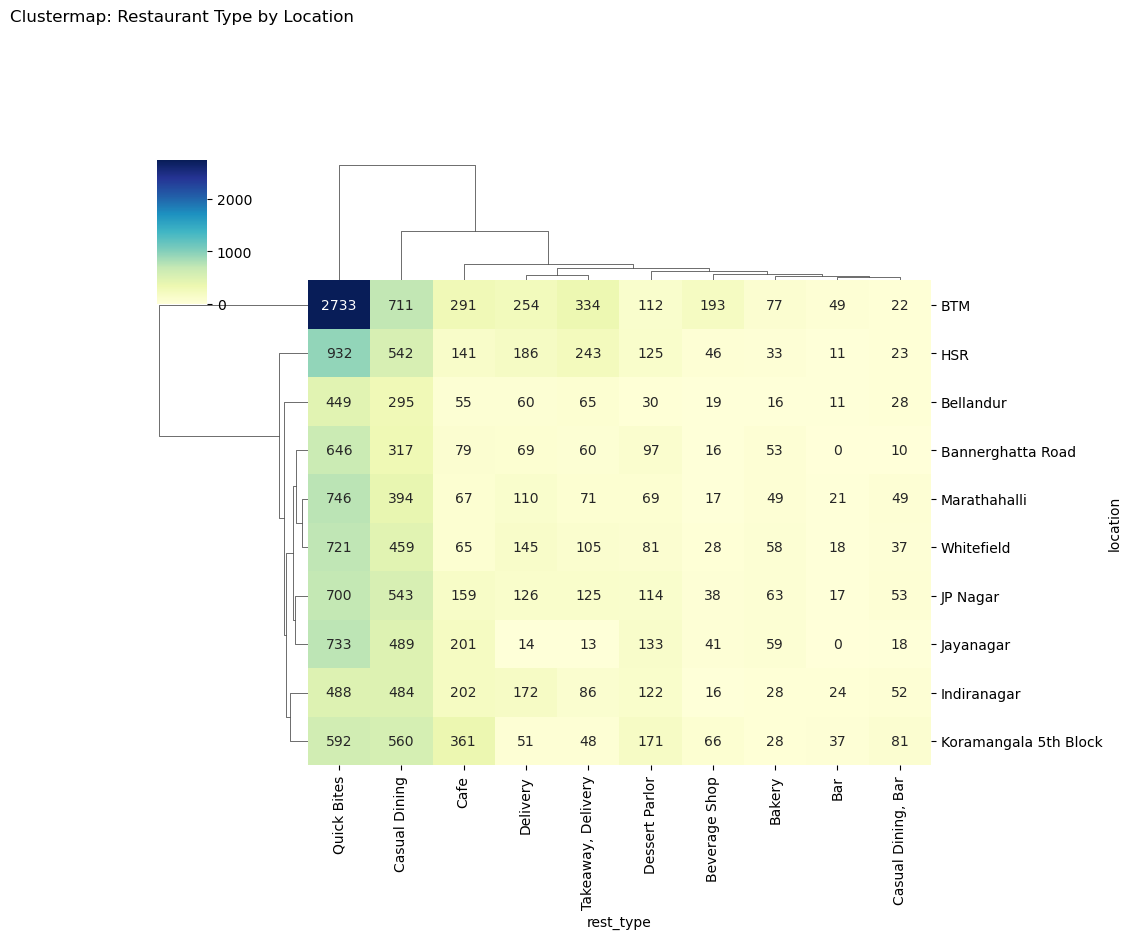

In [126]:
top_locations = df['location'].value_counts().index[:10]
top_rest_types = df['rest_type'].value_counts().index[:10]

# Crosstab
clustermap_data = pd.crosstab(
    df[df['location'].isin(top_locations)]['location'],
    df[df['rest_type'].isin(top_rest_types)]['rest_type']
)

# Clustermap
sns.clustermap(clustermap_data, cmap="YlGnBu", annot=True, fmt='d', figsize=(10, 8))
plt.title("Clustermap: Restaurant Type by Location", pad=100)
plt.show()


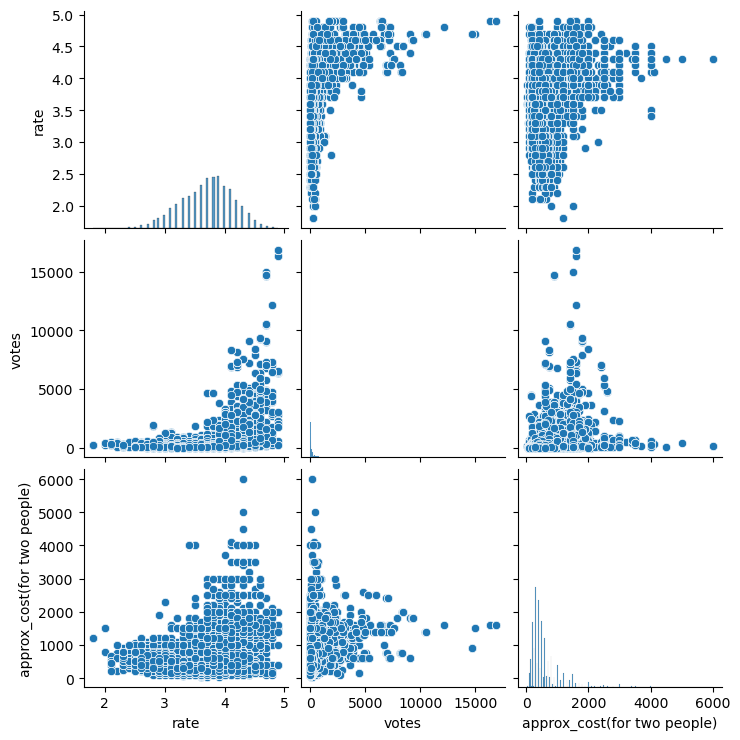

In [127]:
sns.pairplot(df)

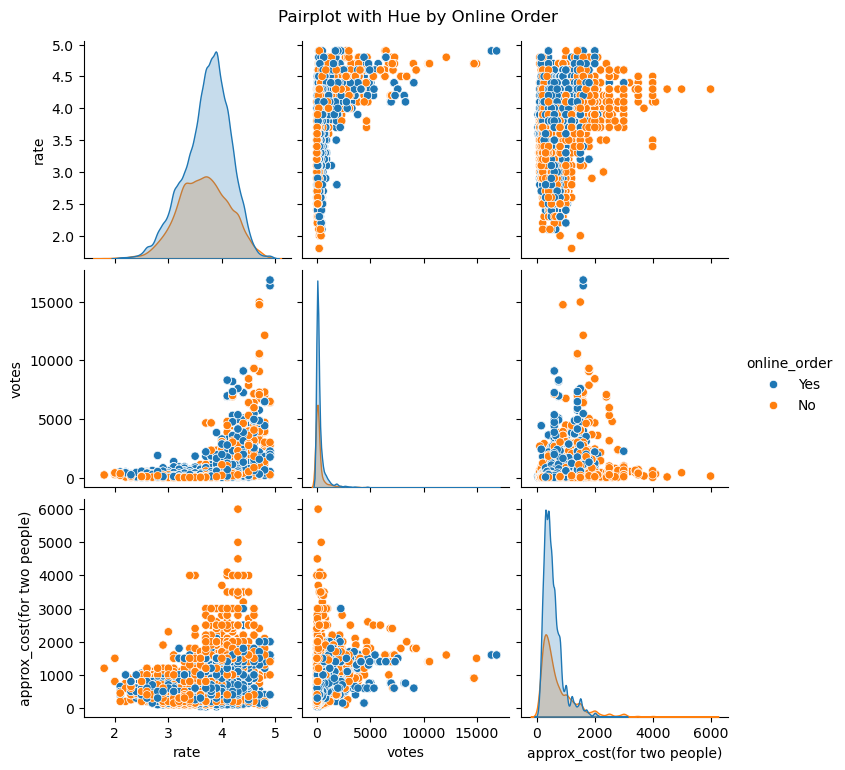

In [128]:
sns.pairplot(df[['rate', 'votes', 'approx_cost(for two people)', 'online_order']].dropna(), hue='online_order')
plt.suptitle('Pairplot with Hue by Online Order', y=1.02)
plt.show()


<Axes: xlabel='None-online_order', ylabel='location'>

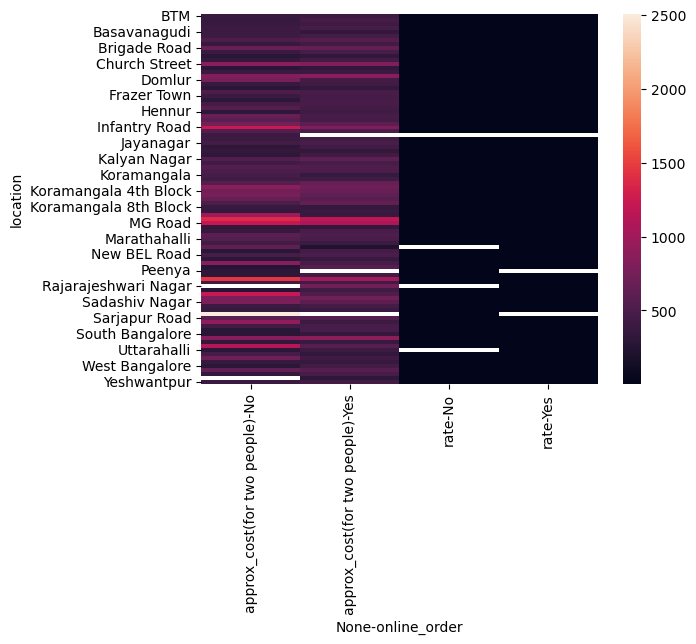

In [129]:
sns.heatmap(df.pivot_table( values=['rate', 'approx_cost(for two people)'], index='location',columns='online_order'))
   

In [180]:
print(X.shape)

(0, 14)


In [130]:
!pip install pandas-profiling

  Using cached visions-0.7.4-py3-none-any.whl.metadata (5.9 kB)
Using cached visions-0.7.4-py3-none-any.whl (102 kB)
  Attempting uninstall: visions
    Found existing installation: visions 0.8.1
    Uninstalling visions-0.8.1:
      Successfully uninstalled visions-0.8.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.16.1 requires visions[type_image_path]<0.8.2,>=0.7.5, but you have visions 0.7.4 which is incompatible.


In [182]:
import pandas as pd

df2 = pd.read_csv("zomato.csv")
df2.head()


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [184]:
import numpy as np

# Clean 'rate'
df2['rate'] = df2['rate'].replace(['NEW', '-', '', 'nan'], np.nan)
df2['rate'] = df2['rate'].astype(str).str.extract(r'(\d+\.\d+)')[0]
df2['rate'] = pd.to_numeric(df2['rate'], errors='coerce')

# Clean cost
df2['approx_cost'] = df2['approx_cost(for two people)'].astype(str).str.replace(',', '', regex=True)
df2['approx_cost'] = pd.to_numeric(df2['approx_cost'], errors='coerce')

# Binary encode
df2['online_order'] = df2['online_order'].map({'Yes': 1, 'No': 0})
df2['book_table'] = df2['book_table'].map({'Yes': 1, 'No': 0})

# Fill missing binary
df2['online_order'] = df2['online_order'].fillna(df2['online_order'].mode()[0])
df2['book_table'] = df2['book_table'].fillna(df2['book_table'].mode()[0])

# Drop rows with missing target or essentials
df2 = df2.dropna(subset=['rate', 'approx_cost', 'votes'])

# Select features
location_cols = [col for col in df2.columns if col.startswith('location_')]
features = ['votes', 'approx_cost', 'online_order', 'book_table'] + location_cols

X = df2[features]
y = df2['rate']

# Train/test split and regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R² Score: 0.28006435146910336
RMSE: 0.37804961921833324


In [186]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("Random Forest R²:", r2_score(y_test, rf_pred))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, rf_pred)))


Random Forest R²: 0.6877189084851516
Random Forest RMSE: 0.24898593217201628


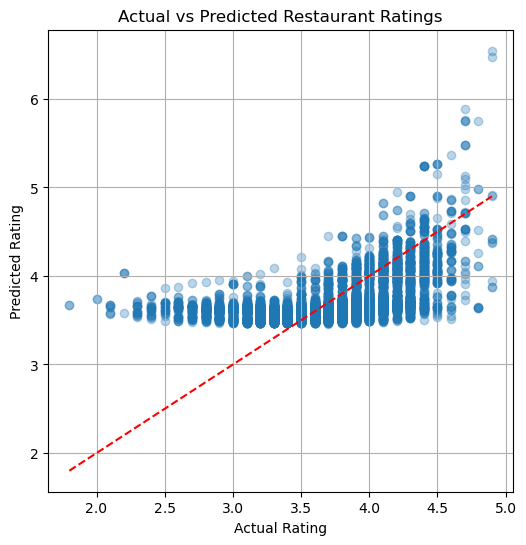

In [188]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("Actual vs Predicted Restaurant Ratings")
plt.grid(True)
plt.show()
